<a href="https://colab.research.google.com/github/hana-magdy/Image-Segmentation/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import numpy as np
from PIL import Image
import scipy.io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import math

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


 1.Download the Dataset and Understand the Format.

In [ ]:
zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Pattern Recognition projects/Image Segmentation/Dataset.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
Names=os.listdir('/content/Dataset/images/train/')
print(Names)
Names.remove('Thumbs.db')

Images_Path='/content/Dataset/images/train/'
groundTruth_Path='/content/Dataset/groundTruth/train/'

images=[]
groundTruth=[]

for name in Names:
  img = Image.open(str(Images_Path+name))
  images.append(np.array(img))
  mat = scipy.io.loadmat(str(groundTruth_Path+str(name.replace('.jpg','.mat'))))
  groundTruth.append(mat)
  



#print(np.array(images).shape)
#print(np.array(images[0]))
#print(np.array(images[1]).shape)
#print(np.array(images[2]).shape)
#print(np.array(images[3]).shape)
#print(np.array(images[4]).shape)
#print(np.array(images[0]))



['103041.jpg', '35058.jpg', '285036.jpg', '95006.jpg', '130034.jpg', '301007.jpg', '66075.jpg', '65019.jpg', '35070.jpg', '388016.jpg', '35010.jpg', '135037.jpg', '198054.jpg', '247085.jpg', '27059.jpg', '372047.jpg', '26031.jpg', '311081.jpg', '33066.jpg', '353013.jpg', '23084.jpg', '65010.jpg', '374020.jpg', '12003.jpg', '189011.jpg', '183055.jpg', '232038.jpg', '144067.jpg', '41004.jpg', '124084.jpg', '22093.jpg', '55067.jpg', '181018.jpg', '169012.jpg', '43070.jpg', '140075.jpg', '254033.jpg', '147021.jpg', '80099.jpg', '145014.jpg', '239096.jpg', '368078.jpg', '61086.jpg', '253036.jpg', 'Thumbs.db', '153093.jpg', '216041.jpg', '159045.jpg', '176019.jpg', '361084.jpg', '216066.jpg', '48055.jpg', '41025.jpg', '196015.jpg', '24004.jpg', '376020.jpg', '94079.jpg', '238011.jpg', '15088.jpg', '277095.jpg', '317080.jpg', '118035.jpg', '140055.jpg', '187003.jpg', '365025.jpg', '135069.jpg', '166081.jpg', '164074.jpg', '242078.jpg', '176035.jpg', '311068.jpg', '155060.jpg', '163014.jpg', '

In [ ]:
def Visualization(index):
  plt.imshow(images[index])
  plt.figure()

  for i in range(0,5):
     plt.imshow(groundTruth[index]['groundTruth'][0][i][0][0][0])
     plt.figure()



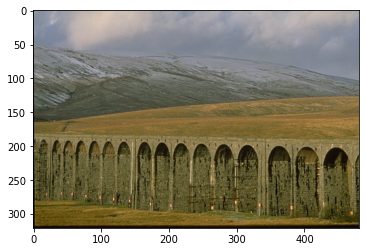

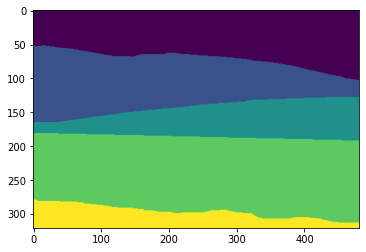

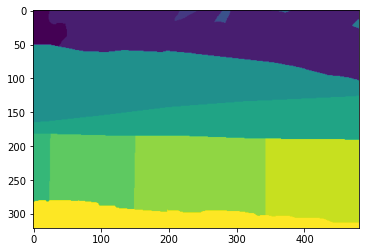

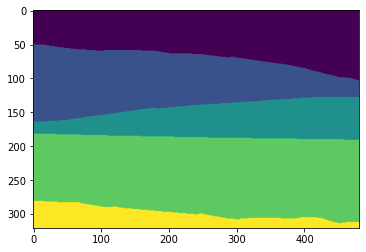

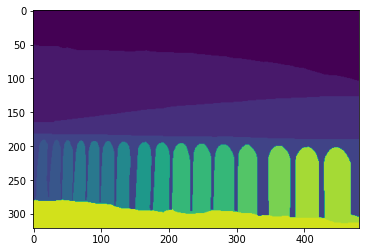

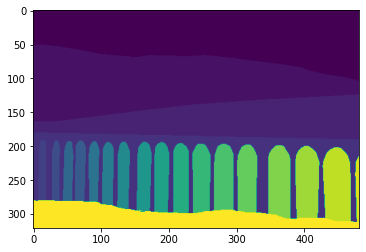

<Figure size 432x288 with 0 Axes>

In [ ]:
Visualization(22)

In [ ]:

def kmeans(ind,x,y,k):
 image=images[ind].reshape(-1,3)
 kmeans = KMeans(n_clusters=k, random_state=0).fit(image)
 Labels=kmeans.predict(image)
 return Labels.reshape(x, y)


<Figure size 432x288 with 0 Axes>

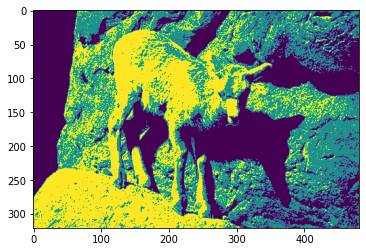

<Figure size 432x288 with 0 Axes>

In [ ]:
Labels3 = []
for i in range(len(images)):
  x,y,z = images[i].shape
  Labels3.append(kmeans(i,x,y,3))

plt.imshow(Labels3[0])
plt.figure()

Labels5 = []
for i in range(len(images)):
  x,y,z = images[i].shape
  Labels5.append(kmeans(i,x,y,5))

Labels7 = []
for i in range(len(images)):
  x,y,z = images[i].shape
  Labels7.append(kmeans(i,x,y,7))

Labels9 = []
for i in range(len(images)):
  x,y,z = images[i].shape
  Labels9.append(kmeans(i,x,y,9))

Labels11 = []
for i in range(len(images)):
  x,y,z = images[i].shape
  Labels11.append(kmeans(i,x,y,11))



### Trial

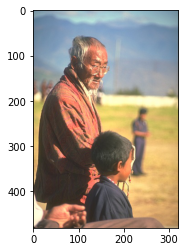

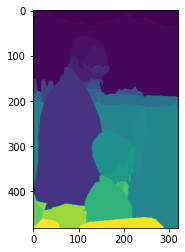

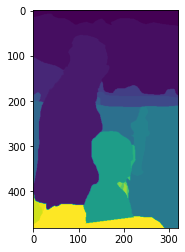

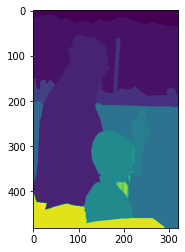

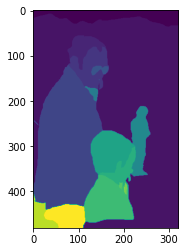

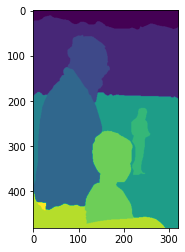

<Figure size 432x288 with 0 Axes>

In [ ]:
TrialImages=[]
TrialImages.append(images[99])
TrialImages.append(images[19])
plt.imshow(images[99])
plt.figure()
#plt.imshow(images[19])
#plt.figure()

TrialGT=[]
TrialGT.append(groundTruth[99])
TrialGT.append(groundTruth[19])

#visualization
for i in range(0,5):
     plt.imshow(TrialGT[0]['groundTruth'][0][i][0][0][0])
     plt.figure()






Kmeans


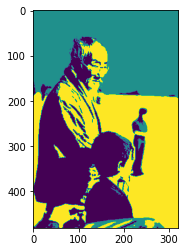

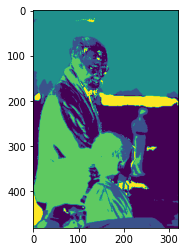

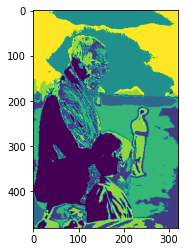

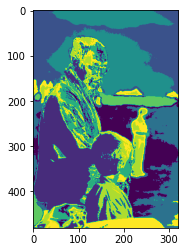

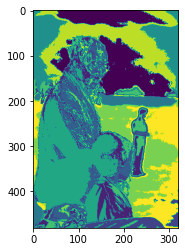

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Kmeans")
x,y,z = TrialImages[0].shape
Labels3=kmeans(99,x,y,3)

plt.imshow(Labels3)
plt.figure()

x,y,z = TrialImages[0].shape
Labels5=kmeans(99,x,y,5)

plt.imshow(Labels5)
plt.figure()

x,y,z = TrialImages[0].shape
Labels7=kmeans(99,x,y,7)

plt.imshow(Labels7)
plt.figure()

x,y,z = TrialImages[0].shape
Labels9=kmeans(99,x,y,9)

plt.imshow(Labels9)
plt.figure()  

x,y,z = TrialImages[0].shape
Labels11=kmeans(99,x,y,11)

plt.imshow(Labels11)
plt.figure()

Total_Labels=[Labels3 , Labels5, Labels7, Labels9, Labels11]



In [ ]:
def Conditional_entropy(cont_mat):
 
  totalEntropy=0

  for i in range (0,len(cont_mat)):
     clusterSum=(np.sum(cont_mat[i]))
     exp=0
     for j in range(0,len(cont_mat[0])):
       if cont_mat[i][j]!=0:
         exp=exp+((-1)*(cont_mat[i][j]/clusterSum)*(math.log(cont_mat[i][j]/clusterSum,2)))
  
     
     print("Entropy for cluster ",str(i)," = ",str(exp))
     totalEntropy=totalEntropy+((clusterSum/np.sum(cont_mat))*exp)
    
     
  print("Conditional Entropy(weighted sum of entropies) = ",totalEntropy)

  return totalEntropy

    

## F_Measure

In [ ]:
def Recall(cont_mat,i):
  cont_matT = cont_mat.T # 47,3
  max=np.amax(cont_mat[i])
  max_index_col = np.argmax(cont_mat[i])
  clusterSum=(np.sum(cont_matT[max_index_col]))
  exp=max/clusterSum
  #print("recall for cluster ",str(i)," = ",str(exp))
  return exp # rec_i


In [ ]:
def Purity(cont_mat,i):
  clusterSum=(np.sum(cont_mat))
  max=np.amax(cont_mat)
  exp=max/clusterSum
  #print("purity for cluster ",str(i)," = ",str(exp))
  return exp # purity_i


In [ ]:
def Fmeasure(cont_mat):
  total_F = 0
  for i in range(0,len(cont_mat)):
    prec_i = Purity(cont_mat[i],i)
    #print('prec_i = ' +str(prec_i))
    rec_i = Recall(cont_mat,i)
    #print('rec_i = ' +str(rec_i))
    Fi = (2*prec_i*rec_i)/(rec_i+prec_i)
    print('F-measure for cluster = '+str(i)+" = " +str(Fi))
    total_F = total_F+Fi
  print('Total F = '+str(total_F/len(cont_mat)))
  return total_F


In [ ]:
K=[3,5,7,9,11]
for k in range(0,5):
  sumEntropy=0
  sumF = 0
  for s in range(0,5):
    print("for k=" +str(K[k])+ " and "+str(s+1) +" segmentation gt")
    CM=contingency_matrix(groundTruth[99]['groundTruth'][0][s][0][0][0], Total_Labels[k])
    print(CM.T.shape)
    entropy=Conditional_entropy(CM.T)
    sumEntropy=sumEntropy+entropy
    print('*******************F Measure Results************************** ')
    sumF = sumF+Fmeasure(CM.T)
    print("***********")
  print("Average entropy for k= ",str(K[k]),"=",str(sumEntropy/5))
  print("Average F-measure for k= ",str(K[k]),"=",str(sumF/5))
  print("*************************************************************************************")
  


for k=3 and 1 segmentation gt
(3, 47)
Entropy for cluster  0  =  2.4876319099782696
Entropy for cluster  1  =  1.410578943961719
Entropy for cluster  2  =  2.662307143984282
Conditional Entropy(weighted sum of entropies) =  2.178346249415732
*******************F Measure Results************************** 
F-measure for cluster = 0 = 0.6091807261773421
F-measure for cluster = 1 = 0.8621534052632142
F-measure for cluster = 2 = 0.6803654634597369
Total F = 0.7172331983000978
***********
for k=3 and 2 segmentation gt
(3, 28)
Entropy for cluster  0  =  1.5818392619427406
Entropy for cluster  1  =  1.6780862284885791
Entropy for cluster  2  =  2.6085885593732603
Conditional Entropy(weighted sum of entropies) =  1.9735174689478514
*******************F Measure Results************************** 
F-measure for cluster = 0 = 0.6256779975069905
F-measure for cluster = 1 = 0.8062797806347208
F-measure for cluster = 2 = 0.5830939733753033
Total F = 0.6716839171723382
***********
for k=3 and 3 segment

In [ ]:
#for k=3 and first segmentation gt
print("for k=3 and first segmentation gt")
CM=contingency_matrix(groundTruth[99]['groundTruth'][0][0][0][0][0], Labels3)
print(CM.T.shape)
Conditional_entropy(CM.T)


for k=3 and first segmentation gt


NameError: ignored

<Figure size 432x288 with 0 Axes>

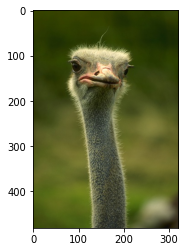

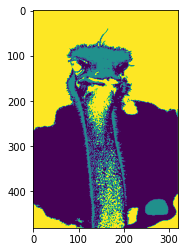

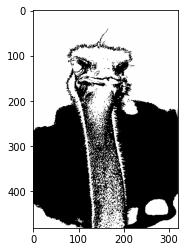

<Figure size 432x288 with 0 Axes>

In [ ]:
import cv2
x,y,z = images[6].shape
L=kmeans(6,x,y,3)

plt.imshow(images[6])
plt.figure()

plt.imshow(L)
plt.figure()

pred=np.dstack([L,L,L])
pred=(pred*255).astype(np.uint8)
predimag=Image.fromarray(pred,'RGB')

plt.imshow(predimag)
plt.figure()
